# **Transforming Data**



```
db.employees.aggregate([
  {
    $project: {
      _id: 0,
      firstname: 1,
      email: 1,
      location: {
        type: "Point",
        coordinates: [
          "$address.location.coordinates.long",  // Longitude
          "$address.location.coordinates.lat"    // Latitude
        ]
      }
    }
  }
])

```



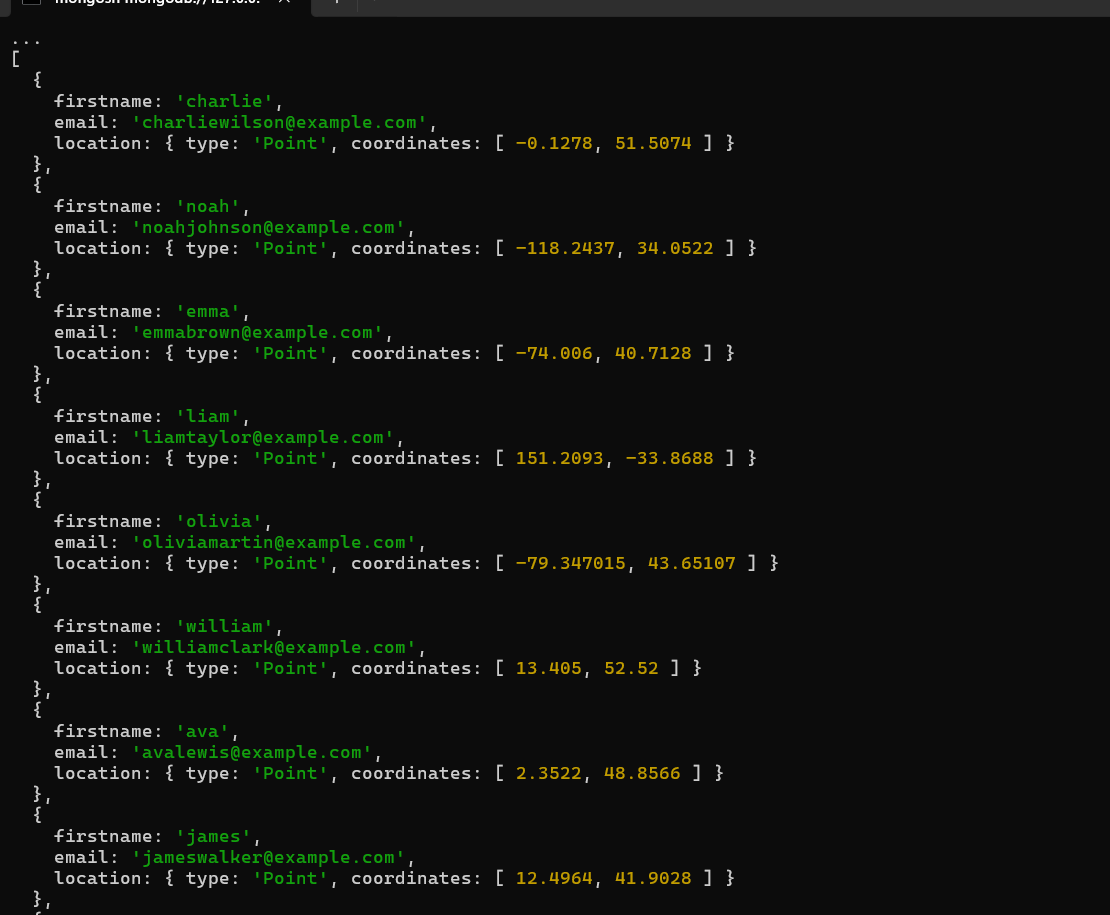

convert to Double data type



```
db.employees.aggregate([
  {
    $project: {
      _id: 0,
      firstname: 1,
      email: 1,
      location: {
        type: "Point",
        coordinates: [
          {
            $convert: {
              input: "$address.location.coordinates.long",
              to: "double",
              onError: 0.00,
              onNull: 0.00
            }
          },
          {
            $convert: {
              input: "$address.location.coordinates.lat",
              to: "double",
              onError: 0.00,
              onNull: 0.00
            }
          }
        ]
      }
    }
  }
])

```



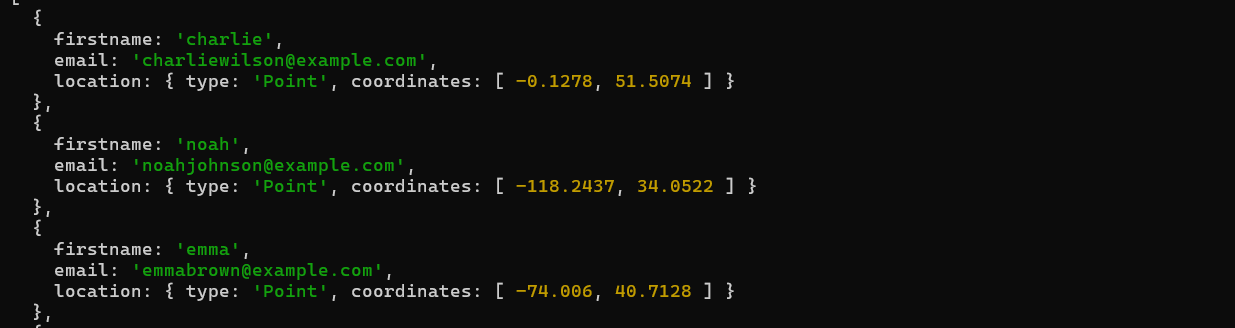

# **Convert to Date**

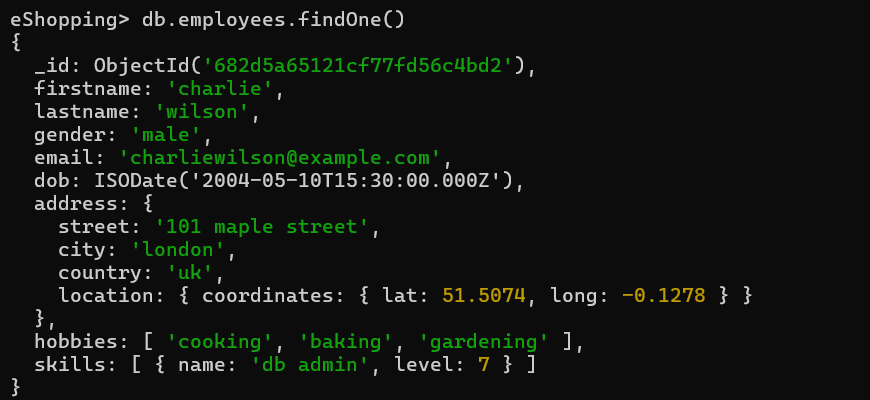



```
db.employees.aggregate([
  {
    $project: {
      _id: 0, // Exclude the _id field
      firstName: 1, // Include firstName
      email: 1, // Include email
      birthDate: { $toDate: "$dob" } // Convert dob to date and rename to birthDate
    }
  }
])
```



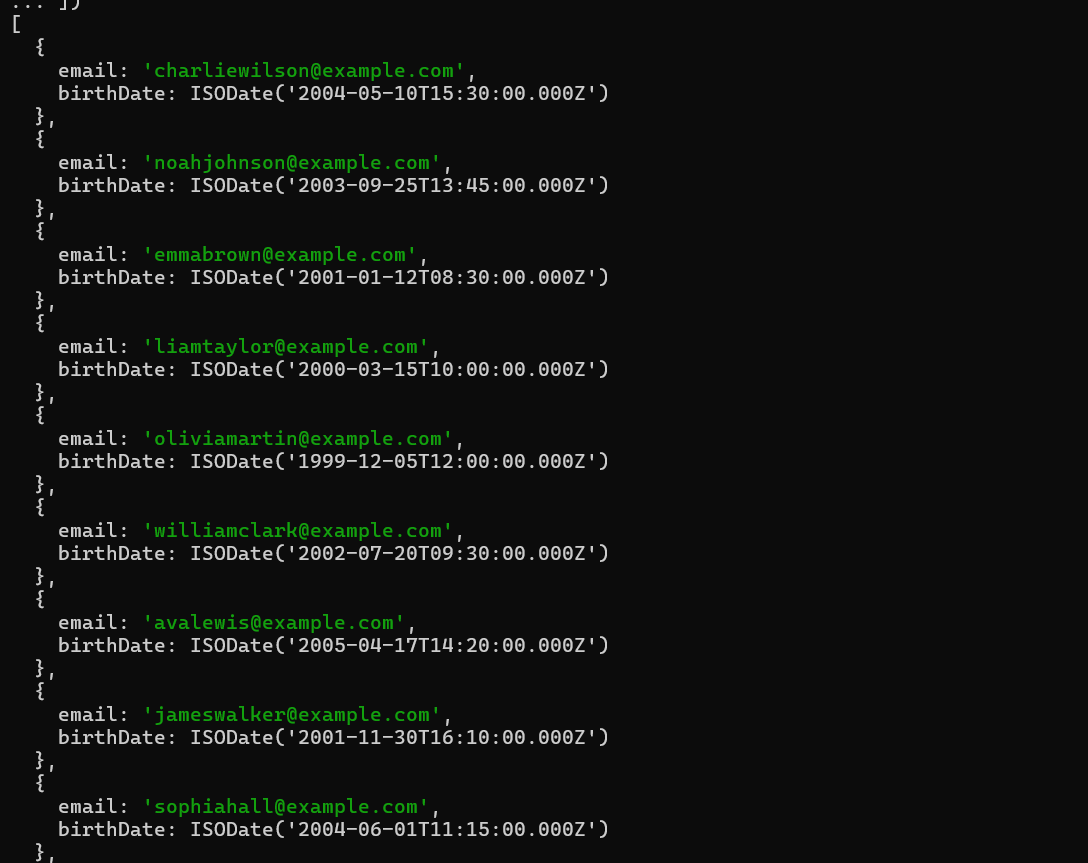

# **group()**

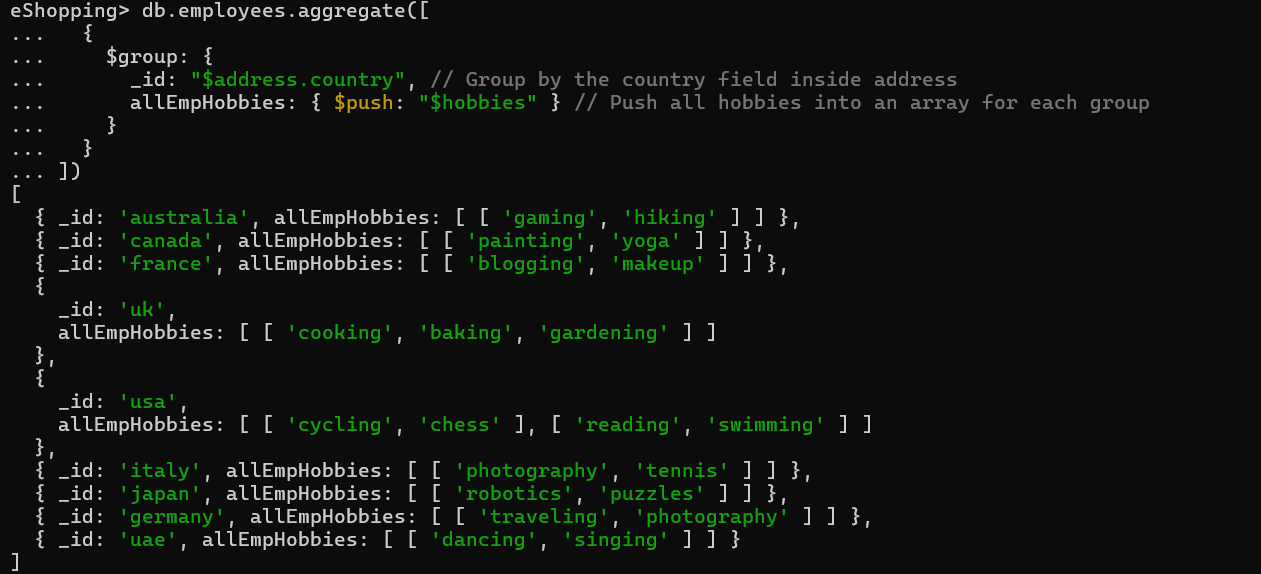

# **unwinding arrays**


**In MongoDB, unwinding arrays refers to the process of deconstructing an array field in a document into individual documents using the $unwind stage in an aggregation pipeline. This is useful when you want to work with each element of an array as a separate document.**

# **What $unwind Does:**

Takes an array field in a document.

Creates a new document for each element in the array, duplicating the other fields of the original document.

Replaces the array field with a single element from the array in each new document.



```
{ $unwind: "$arrayField" }
```





```
db.employees.aggregate([
  { $unwind: "$hobbies" },
  {
    $group: {
      _id: "$address.country",
      allEmpHobbies: { $addToSet: "$hobbies" }
    }
  }
])
```



✅ Group to eliminate duplicates and collect all hobbies.

🔁 Unwind to expand the hobbies array into multiple documents again.

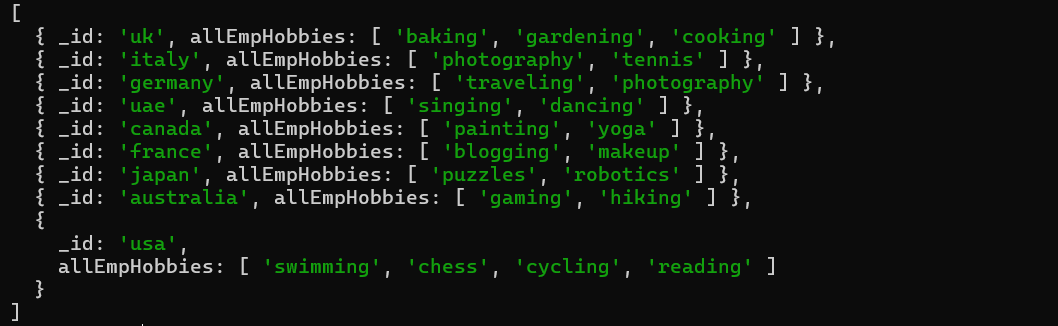